# Chapter 4: Machine Learning state of the art
## Figure 4.24
ROC curve example.

Example taken from http://scikit-learn.org/stable/modules/model_evaluation.html#receiver-operating-characteristic-roc

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
data = datasets.load_digits()
X = data.data
y = data.target

# Binarize the output
y = label_binarize(y, classes=np.unique(y))
n_classes = y.shape[1]
print("{} classes".format(n_classes))

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
sss = StratifiedShuffleSplit(n_splits=1, test_size=.99, random_state=0)
idx_train, idx_test = next(sss.split(X, y))
X_train, X_test, y_train, y_test = X[idx_train, :], X[idx_test, :], y[idx_train], y[idx_test]

10 classes


In [29]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state), n_jobs=-1)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

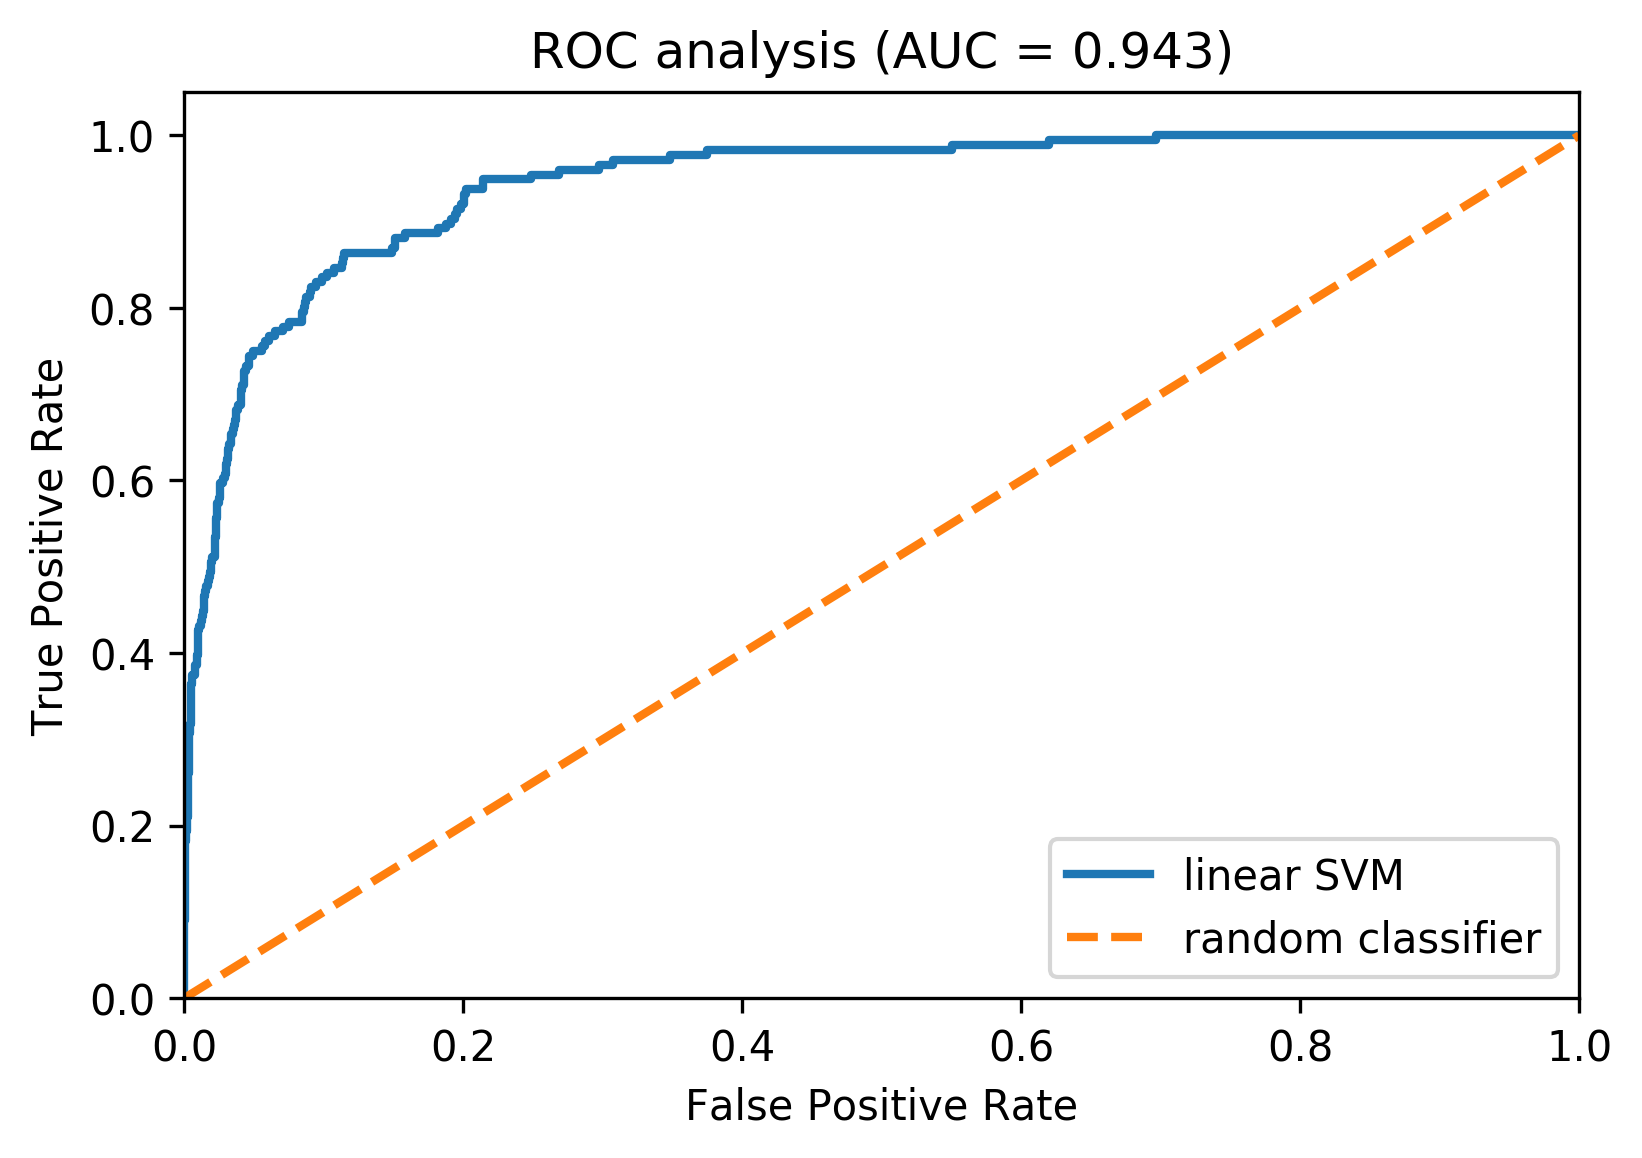

In [32]:
plt.figure(dpi=300)
lw = 2
plt.plot(fpr[2], tpr[2], color='C0',
         lw=lw, label='linear SVM')
plt.plot([0, 1], [0, 1], color='C1', lw=lw, linestyle='--', label='random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC analysis (AUC = {:2.3f})'.format(roc_auc[2]))
plt.legend(loc="lower right")

plt.savefig('../images/roc.png')